In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.utils import shuffle

### Defining custom functions

In [2]:
def load_data(path):
    df = pd.read_csv(path, sep=',')
    return df

In [3]:
def prepare_data(npis):
    total_length = len(df)

    #prepare stringency index
    si = df["StringencyIndex_Average"].values
    si = si/100

    #prepare samples and labels
    samples = si[1:]
    labels = []

    for npi in npis:
      prev_day = df[npi].values[:total_length-1]
      samples = np.column_stack((samples,prev_day))
      labels.append(df[npi].values[1:])

    return samples, labels

In [4]:
def split_data(samples, labels, ratio=0.85):
    split_index = math.floor(ratio * len(samples))

    train_samples = samples[:split_index]
    train_labels = []

    for label in labels:
      train_labels.append(label[:split_index])

    test_samples = samples[split_index:]
    test_labels = []

    for label in labels:
      test_labels.append(label[split_index:])

    return train_samples, train_labels, test_samples, test_labels

### Preprocess data

In [5]:
npis = [
    "C1M",
    "C2M",
    "C3M",
    "C4M",
    "C5M",
    "C6M",
    "C7M",
    "C8M",
    "H1"
    ]
npi_labels = [
    "School closing",
    "Workplace closing",
    "Cancel public events",
    "Restrictions on gatherings",
    "Close public transport",
    "Stay at home requirements",
    "Restrictions on internal movement",
    "International travel controls",
    "Public information campaigns"
]

In [6]:
df = load_data("./OxCGRT_clean.csv")

In [7]:
df.head(10)

,CountryName,Date,C1M,C1M_Flag,C2M,C2M_Flag,C3M,C3M_Flag,C4M,C4M_Flag,...,C8M,H1,H1_Flag,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,Prev_StringencyIndex_Average,Daily_StringencyIndex_Change
0,Aruba,20200316,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,NV,0.0,11.11,0.00,0
1,Aruba,20200317,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,3.0,0.0,NV,0.0,22.22,11.11,0
2,Aruba,20200318,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,1.0,4.0,0.0,NV,0.0,33.33,22.22,0
3,Aruba,20200321,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,4.0,2.0,1.0,5.0,0.0,NV,0.0,44.44,33.33,0
4,Aruba,20200329,3.0,1.0,3.0,1.0,2.0,1.0,4.0,1.0,...,4.0,2.0,1.0,50.0,0.0,NV,0.0,85.19,44.44,0
5,Aruba,20200410,3.0,1.0,3.0,1.0,2.0,1.0,4.0,1.0,...,4.0,2.0,1.0,86.0,0.0,NV,0.0,88.89,85.19,0
6,Aruba,20200504,3.0,1.0,2.0,1.0,2.0,1.0,4.0,1.0,...,4.0,2.0,1.0,100.0,2.0,NV,0.0,81.48,88.89,0
7,Aruba,20200518,2.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,...,4.0,2.0,1.0,101.0,3.0,NV,0.0,66.67,81.48,0
8,Aruba,20200528,2.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,...,4.0,2.0,1.0,101.0,3.0,NV,0.0,62.96,66.67,0
9,Aruba,20200531,2.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,...,4.0,2.0,1.0,101.0,3.0,NV,0.0,57.41,62.96,0


In [8]:
df[["StringencyIndex_Average"] + npis]

,StringencyIndex_Average,C1M,C2M,C3M,C4M,C5M,C6M,C7M,C8M,H1
0,11.11,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22.22,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,33.33,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0
3,44.44,3.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0
4,85.19,3.0,3.0,2.0,4.0,0.0,2.0,2.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...
17018,52.65,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,2.0
17019,52.64,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,2.0
17020,52.63,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,2.0
17021,52.62,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,2.0


In [9]:
samples, labels = prepare_data(npis)

In [10]:
samples

array([[0.2222, 3.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.3333, 3.    , 0.    , ..., 0.    , 4.    , 0.    ],
       [0.4444, 3.    , 0.    , ..., 0.    , 4.    , 2.    ],
       ...,
       [0.5263, 1.    , 1.    , ..., 1.    , 1.    , 2.    ],
       [0.5262, 1.    , 1.    , ..., 1.    , 1.    , 2.    ],
       [0.537 , 1.    , 1.    , ..., 1.    , 1.    , 2.    ]])

In [11]:
labels

[array([3., 3., 3., ..., 1., 1., 1.]),
 array([0., 0., 2., ..., 1., 1., 1.]),
 array([0., 0., 0., ..., 1., 1., 1.]),
 array([0., 0., 0., ..., 3., 3., 3.]),
 array([0., 0., 0., ..., 1., 1., 1.]),
 array([0., 0., 1., ..., 2., 2., 2.]),
 array([0., 0., 0., ..., 1., 1., 1.]),
 array([4., 4., 4., ..., 1., 1., 1.]),
 array([0., 2., 2., ..., 2., 2., 2.])]

In [12]:
not_shuffled_samples = samples[15000:16000]
not_shuffled_labels = []
for label in labels:
  not_shuffled_labels.append(label[15000:16000])


In [13]:
samples, *labels = shuffle(samples, *labels, random_state=0)

In [14]:
train_samples, train_labels, test_samples, test_labels = split_data(samples, labels)

In [15]:
train_samples

array([[0.7731, 3.    , 2.    , ..., 2.    , 1.    , 2.    ],
       [0.5509, 3.    , 1.    , ..., 0.    , 4.    , 2.    ],
       [0.4444, 0.    , 0.    , ..., 1.    , 2.    , 2.    ],
       ...,
       [0.6296, 3.    , 2.    , ..., 0.    , 1.    , 2.    ],
       [0.5332, 0.    , 1.    , ..., 2.    , 1.    , 2.    ],
       [0.4167, 3.    , 0.    , ..., 0.    , 1.    , 2.    ]])

In [16]:
train_labels

[array([3., 3., 3., ..., 3., 0., 3.]),
 array([2., 1., 0., ..., 2., 2., 0.]),
 array([2., 2., 2., ..., 2., 1., 2.]),
 array([4., 4., 0., ..., 4., 4., 0.]),
 array([0., 0., 0., ..., 1., 1., 0.]),
 array([2., 1., 0., ..., 2., 0., 0.]),
 array([2., 0., 1., ..., 0., 2., 0.]),
 array([3., 4., 2., ..., 1., 1., 3.]),
 array([2., 2., 2., ..., 2., 2., 2.])]

## MTL model

In [17]:
from keras.optimizers import Adam
from keras import Input, Model
from keras.layers import Dense

num_tasks = 9
num_features = num_tasks + 1

shared_layer_1 = Dense(32, input_dim=num_features, activation='relu')
shared_layer_2 = Dense(32, activation='relu')

task_1_output_layer = Dense(5, activation='softmax', name='C1')
task_2_output_layer = Dense(5, activation='softmax', name='C2')
task_3_output_layer = Dense(5, activation='softmax', name='C3')
task_4_output_layer = Dense(5, activation='softmax', name='C4')
task_5_output_layer = Dense(5, activation='softmax', name='C5')
task_6_output_layer = Dense(5, activation='softmax', name='C6')
task_7_output_layer = Dense(5, activation='softmax', name='C7')
task_8_output_layer = Dense(5, activation='softmax', name='C8')
task_9_output_layer = Dense(5, activation='softmax', name='H1')

input_tensor = Input(shape=(num_features,))

shared_tensor = shared_layer_1(input_tensor)
shared_tensor = shared_layer_2(shared_tensor)

task_1_output = task_1_output_layer(shared_tensor)
task_2_output = task_2_output_layer(shared_tensor)
task_3_output = task_3_output_layer(shared_tensor)
task_4_output = task_4_output_layer(shared_tensor)
task_5_output = task_5_output_layer(shared_tensor)
task_6_output = task_6_output_layer(shared_tensor)
task_7_output = task_7_output_layer(shared_tensor)
task_8_output = task_8_output_layer(shared_tensor)
task_9_output = task_9_output_layer(shared_tensor)

mtl_model = Model(inputs=input_tensor, outputs=[
    task_1_output, 
    task_2_output,
    task_3_output, 
    task_4_output,
    task_5_output, 
    task_6_output,
    task_7_output, 
    task_8_output,
    task_9_output],)

mtl_model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss={
            'C1': 'sparse_categorical_crossentropy',
            'C2': 'sparse_categorical_crossentropy',
            'C3': 'sparse_categorical_crossentropy',
            'C4': 'sparse_categorical_crossentropy',
            'C5': 'sparse_categorical_crossentropy',
            'C6': 'sparse_categorical_crossentropy',
            'C7': 'sparse_categorical_crossentropy',
            'C8': 'sparse_categorical_crossentropy',
            'H1': 'sparse_categorical_crossentropy'
            },
        metrics={
            'C1': 'accuracy',
            'C2': 'accuracy',
            'C3': 'accuracy',
            'C4': 'accuracy',
            'C5': 'accuracy',
            'C6': 'accuracy',
            'C7': 'accuracy',
            'C8': 'accuracy',
            'H1': 'accuracy'
            }
        )
mtl_model.summary()

mtl_model.fit(
    x=train_samples.reshape(-1,num_features),
    y=train_labels,
    validation_split=0.1,
    batch_size=10,
    epochs=10,
    shuffle=True,
    verbose=2
)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           352         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 32)           1056        ['dense[0][0]']                  
                                                                                                  
 C1 (Dense)                     (None, 5)            165         ['dense_1[0][0]']                
                                                                                              

# Predict

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## test data

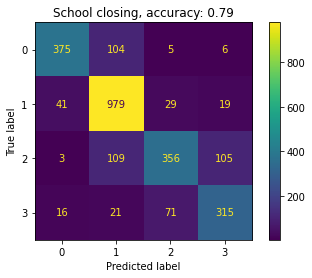

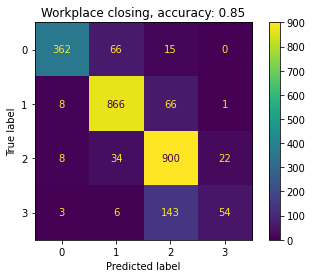

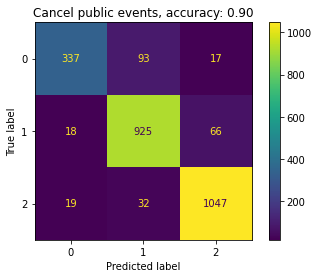

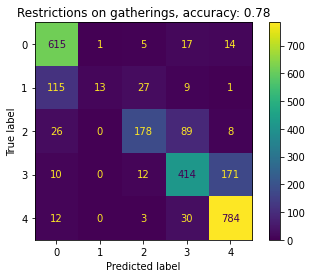

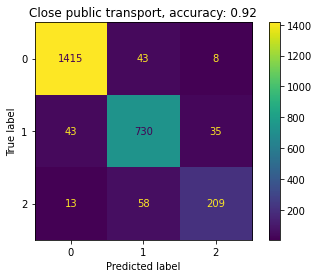

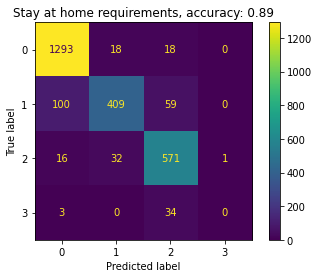

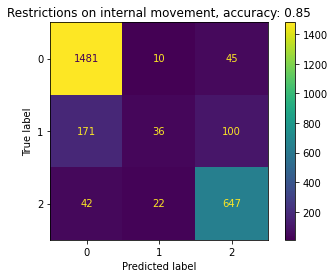

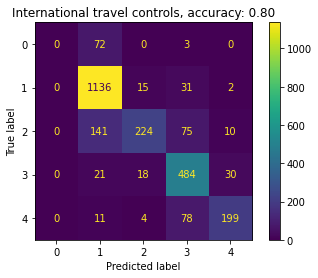

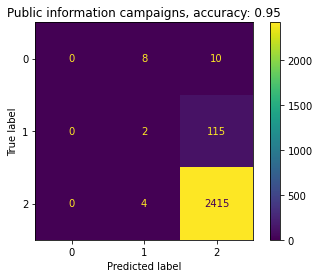

In [19]:
from sklearn.metrics import accuracy_score

predictions = mtl_model.predict(
    x=test_samples.reshape(-1,num_features),
    batch_size = 10,
    verbose = 0)

predictions = np.array(predictions)

f = lambda x: np.argmax(x, axis=-1)
predictions = f(predictions)

for idx, pred in enumerate(predictions):
  cm = confusion_matrix(y_true=test_labels[idx], y_pred=pred)
  accuracy = accuracy_score(test_labels[idx], pred).round(2)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  disp.ax_.set_title(npi_labels[idx] + ", accuracy: %.2f"%accuracy)
  plt.show()

## Recursive predictions

In [20]:

predicted_sample = not_shuffled_samples[99]

iterative_predictions = []
next_samples = []

for i in range(100,200):
    predictions = mtl_model.predict(
        x=predicted_sample.reshape(-1,num_features),
        batch_size = 10,
        verbose = 0)

    predictions = np.array(predictions)

    f = lambda x: np.argmax(x, axis=-1)
    predictions = f(predictions)
    predicted_sample = np.concatenate(([not_shuffled_samples[i][0]], predictions.flatten()))
    next_samples.append(predicted_sample)
    iterative_predictions.append(predictions.flatten())

print(type(np.array(iterative_predictions)))
print(type(not_shuffled_samples))

zipped_predicted_npis = list(zip(*iterative_predictions))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Barcharts

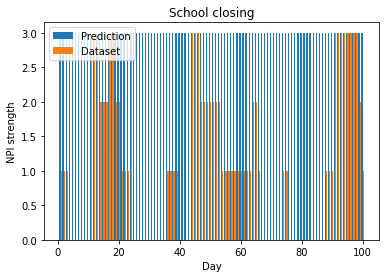

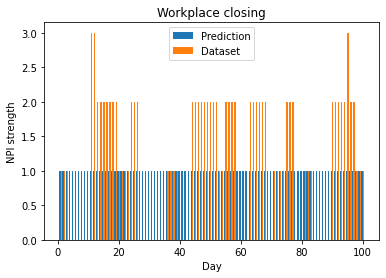

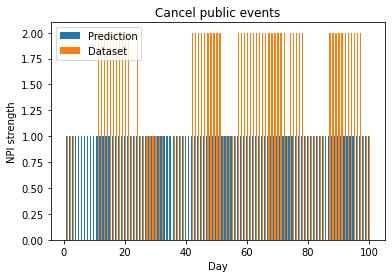

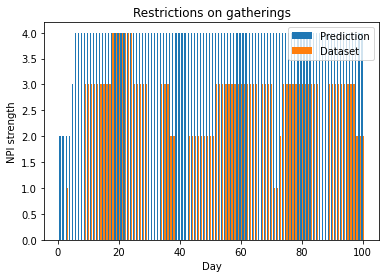

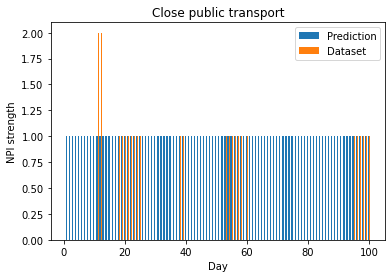

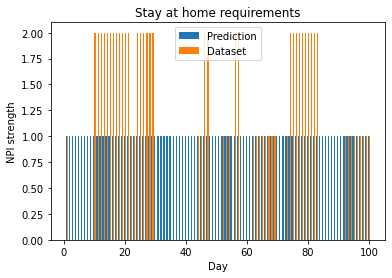

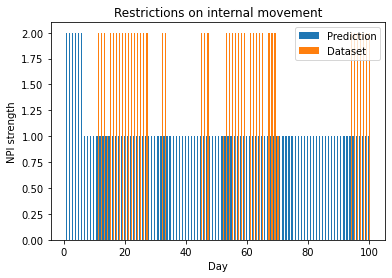

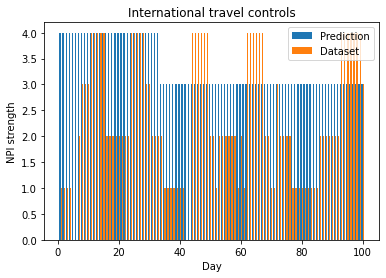

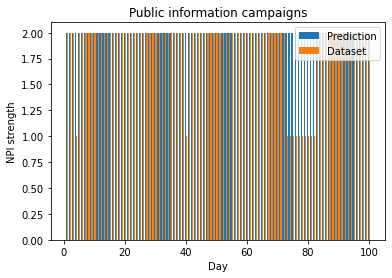

In [21]:
# Define the arrays
x = np.arange(1, 101)


for i in range(0,9):
    predicted_y = np.array(zipped_predicted_npis[i][0:100])
    label_y = not_shuffled_labels[i][0:100]

    # Create the bar chart
    fig, ax = plt.subplots()
    ax.bar(x - 0.2, predicted_y, width=0.4, label='Prediction')
    ax.bar(x + 0.2, label_y, width=0.4, label='Dataset')

    # Add labels and legend
    ax.set_xlabel('Day')
    ax.set_ylabel('NPI strength')
    ax.set_title(npi_labels[i])
    ax.legend()

    # Display the chart
    plt.show()